In [1]:
import string
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

In [2]:
# Function to clean the text
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

# Function to remove stopwords
def remove_stopwords(text):
    words = word_tokenize(text, "english")
    cleaned_words = [word for word in words if word not in stopwords.words('english')]
    return cleaned_words

# Function to extract emotions from text
def extract_emotions(words):
    emotion_list = []
    with open('emotions.txt', 'r') as file:
        for line in file:
            clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
            word, emotion = clear_line.split(':')
            if word in words:
                emotion_list.append(emotion)
    return emotion_list

What would you like to say... I love you
Emotions: [' love']
Emotion Counts: Counter({' love': 1})
Sentiment Analysis: Positive Sentiment


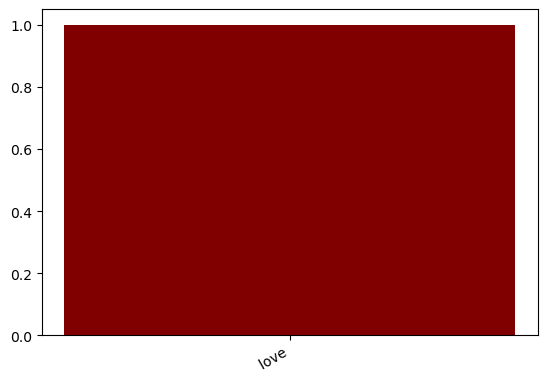

In [3]:
# Function for sentiment analysis
def sentiment_analysis(sentiment_text):
    analyzer = SentimentIntensityAnalyzer()
    score = analyzer.polarity_scores(sentiment_text)
    neg = score['neg']
    pos = score['pos']
    if neg > pos:
        return "Negative Sentiment"
    elif pos > neg:
        return "Positive Sentiment"
    else:
        return "Neutral Sentiment"

# Function to plot emotions
def plot_emotions(emotion_counts):
    fig, ax1 = plt.subplots()
    ax1.bar(emotion_counts.keys(), emotion_counts.values(), color='maroon')
    fig.autofmt_xdate()
    plt.savefig('graph.png')
    plt.show()

# Main execution
if __name__ == "__main__":
    text = input("What would you like to say... ")
    cleaned_text = clean_text(text)
    words = remove_stopwords(cleaned_text)
    emotions = extract_emotions(words)

    print("Emotions:", emotions)
    emotion_counts = Counter(emotions)
    print("Emotion Counts:", emotion_counts)

    sentiment = sentiment_analysis(cleaned_text)
    print("Sentiment Analysis:", sentiment)

    plot_emotions(emotion_counts)